## Correlation Analysis of all patients data

In [218]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from preepiseizures.src import Patient, biosignal_processing



In [219]:
patient = 'NJML'

patient_info = Patient.patient_class(patient)
corr_data = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s.parquet'))

data = pd.read_parquet('data/respiration/{patient}_all_respiration_data.parquet'.format(patient=patient))
train_data = pd.read_parquet('data/autoencoders_epilepsy/{patient}_data_segments_train_20p_1s.parquet'.format(patient=patient))
#data['datetime'] += pd.Timedelta(patient_info.patient_dict['temporal_shift']) 

In [220]:
print(train_data.shape)
print(corr_data.shape)

(440, 1000)
(181, 1)


In [221]:
train_data.index[-1] - train_data.index[0]

Timedelta('0 days 13:13:48.003111159')

In [222]:
resp_rate = pd.DataFrame()

for i in range(len(corr_data)):
    start_time = corr_data.iloc[i].name
    data_segment = data.loc[data['datetime'].between(start_time, start_time + pd.Timedelta(minutes=1))]['RESP'].copy()
    rate = biosignal_processing.resp_rate(data_segment, sampling_rate=80, overlap=60, window_size=60)
    resp_rate = pd.concat([resp_rate, pd.DataFrame({'rate': rate[0], 'datetime': start_time})], ignore_index=True)
corr_data = corr_data.merge(resp_rate, left_index=True, right_on='datetime')


In [223]:
fig = px.scatter(corr_data, x='datetime', y='rate', title='Respiration rate during seizures', color='corr')
fig.show()

In [224]:
corr_data.loc[corr_data['resp_rate_level'] == 'good']

KeyError: 'resp_rate_level'

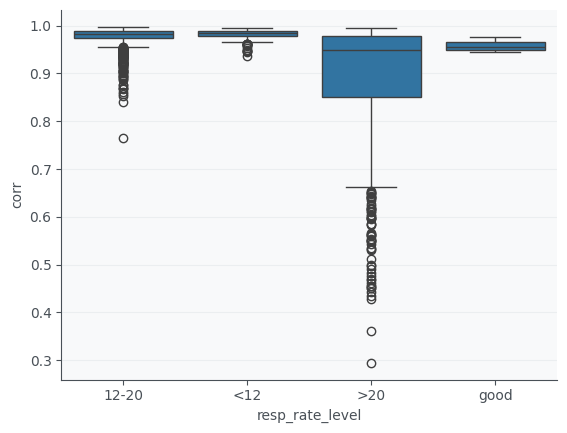

In [ ]:
sns.boxplot(x='resp_rate_level', y='corr', data=corr_data)
plt.show()

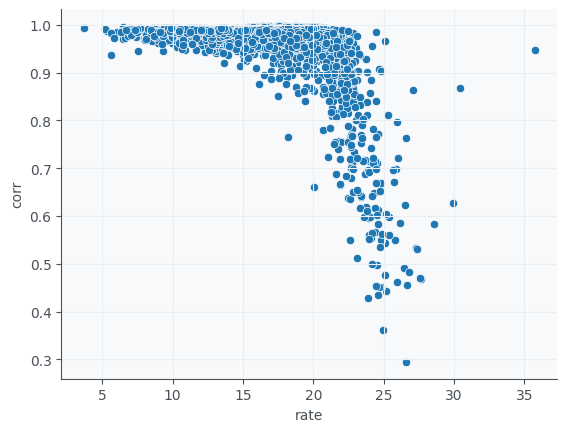

In [ ]:
sns.scatterplot(x='rate', y='corr', data=corr_data)
plt.show()

In [225]:
sns.violinplot(x='corr_level', y='rate', data=corr_data)

ValueError: Could not interpret value `corr_level` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='rate', ylabel='Count'>

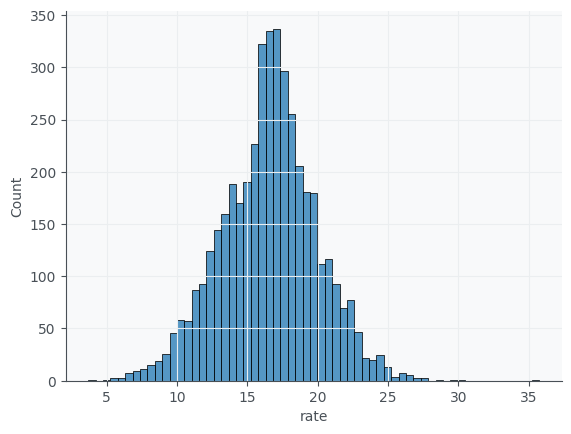

In [ ]:
sns.histplot(corr_data['rate'])

## Analysis of all patients

In [262]:
corr_all = pd.DataFrame()
patients = [file.split('_')[0] for file in os.listdir('data/autoencoders_epilepsy/') if file.endswith('corr_points_1s.parquet')]
for patient in sorted(patients):
    corr_points_patient = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s.parquet'))
    train_data = pd.read_parquet('data/autoencoders_epilepsy/{patient}_data_segments_train_20p_1s.parquet'.format(patient=patient))

    corr_points_patient['datetime'] = corr_points_patient.index
    corr_points_patient['patient'] = patient
    corr_points_patient['length'] = len(corr_points_patient)
    corr_points_patient['len_train'] = len(train_data)/3600
    corr_points_patient['len_train_hours'] = train_data.index[-1] - train_data.index[0]
    
    #print(patient, np.round(corr_points_patient['corr'].mean(),2), np.round(corr_points_patient['corr'].std(),2))
    corr_all = pd.concat([corr_all, corr_points_patient], ignore_index=True)

In [264]:
corr_all.sort_values(by='len_train', ascending=True, inplace=True)

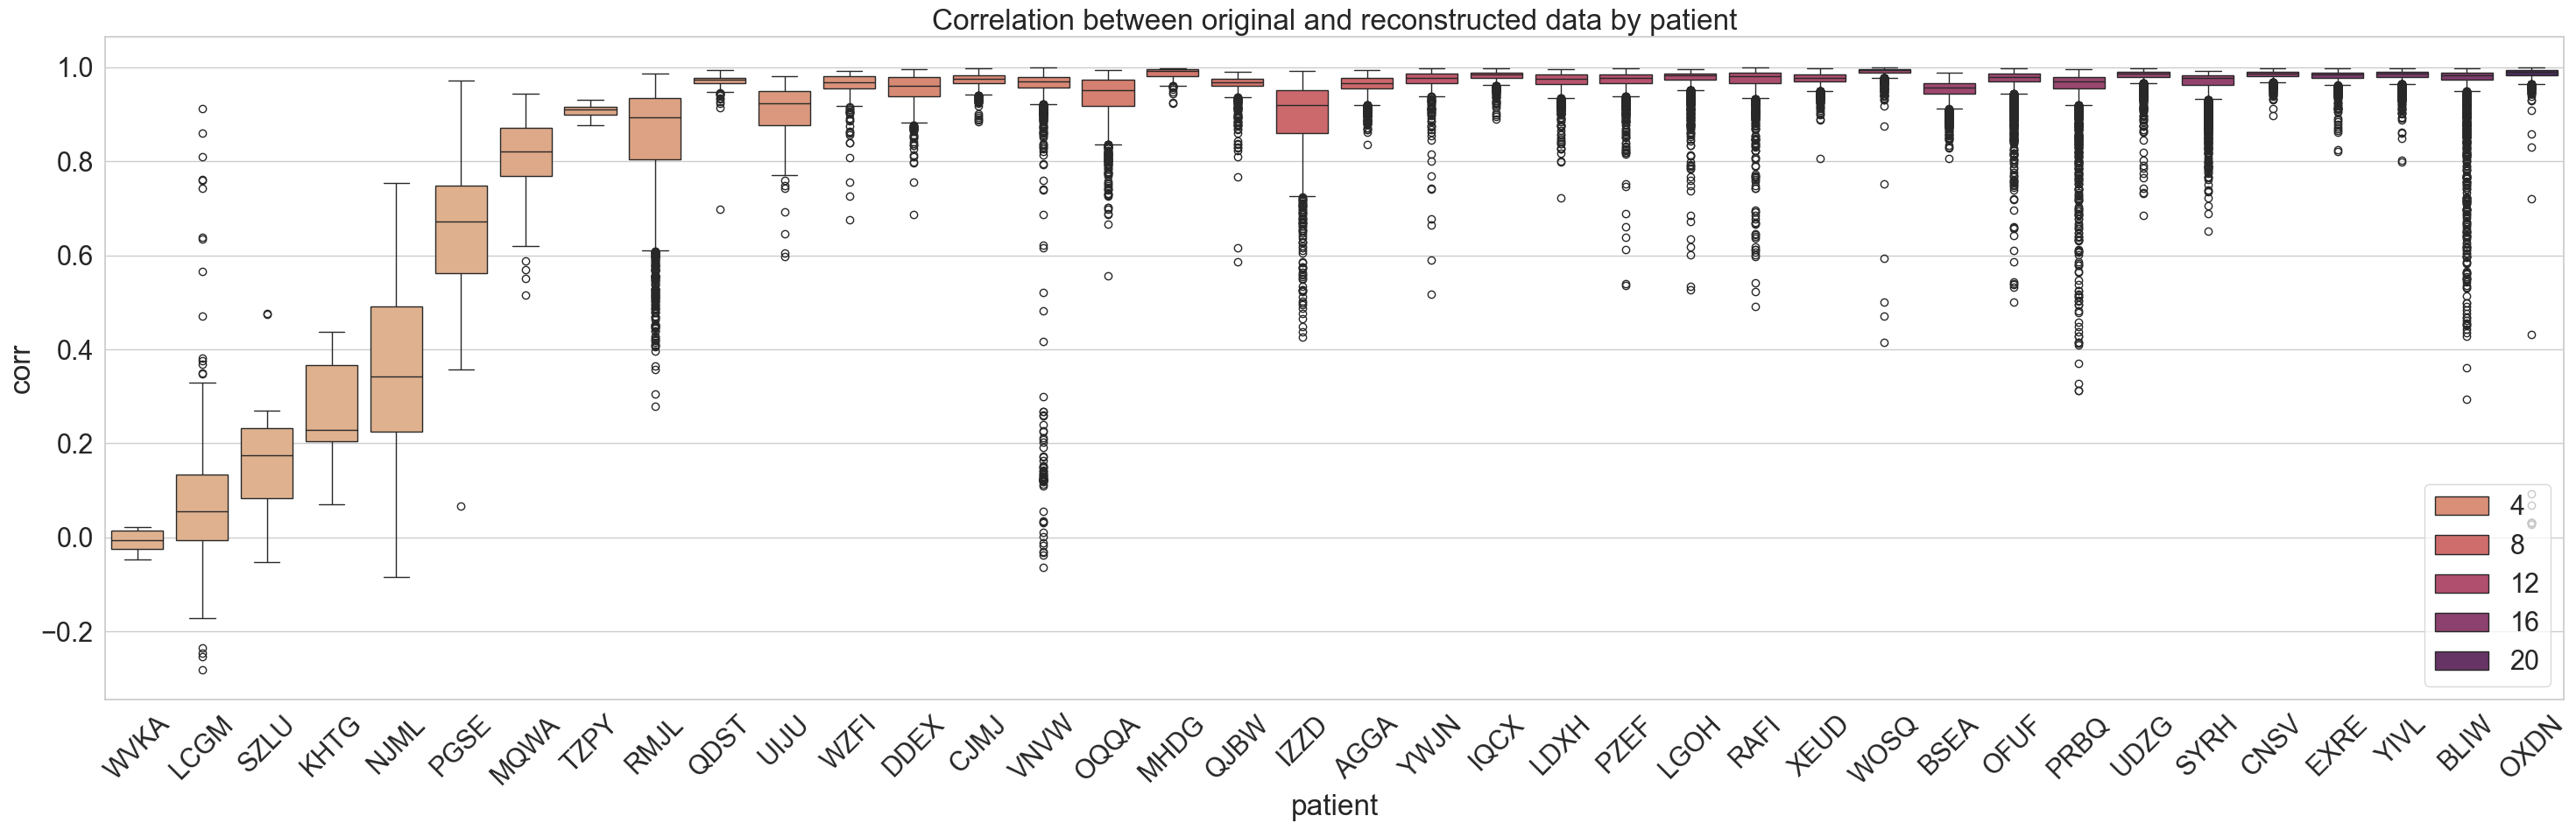

In [257]:

plt.figure(figsize=(30, 10))
sns.set(style='whitegrid', font_scale=2)
sns.boxplot(data=corr_all, x='patient', y='corr', hue='len_train', palette='flare')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.title('Correlation between original and reconstructed data by patient')
plt.tight_layout()
plt.savefig('data/figures/corr_boxplot_color_dots.pdf', dpi=300)

In [266]:
corr_all[['len_train', 'patient', 'len_train_hours', 'length']].drop_duplicates()

,len_train,patient,len_train_hours,length
60739,0.015000,WVKA,0 days 00:00:53.000959861,6
22752,0.040278,LCGM,0 days 00:07:04.000402163,327
52851,0.047500,SZLU,0 days 11:36:32.002338287,12
22524,0.090000,KHTG,0 days 00:06:22.997413302,9
28414,0.122222,NJML,0 days 13:13:48.003111159,181
36527,0.291111,PGSE,0 days 00:17:27.003344594,66
28188,0.983333,MQWA,0 days 00:58:59.011306120,115
52866,1.377778,TZPY,0 days 03:15:47.001580315,4
48606,1.790000,RMJL,0 days 02:54:06.005982177,2093
42762,2.205556,QDST,0 days 02:38:57.005344842,314


In [267]:
small_patients = corr_all.loc[corr_all['len_train'] < 2]['patient'].unique()
small_patients

array(['WVKA', 'LCGM', 'SZLU', 'KHTG', 'NJML', 'PGSE', 'MQWA', 'TZPY',
       'RMJL'], dtype=object)

In [299]:
corr_all_rate = pd.DataFrame()
means = pd.DataFrame()
patients = [file.split('_')[0] for file in os.listdir('data/autoencoders_epilepsy/') if file.endswith('corr_points_1s.parquet')]
for patient in sorted(patients):
    if patient in small_patients:
        continue
    if patient in ['DDEX', 'QDST', 'WOSQ']:
        continue
    patient_info = Patient.patient_class(patient)
    corr_data = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s_resp_rate.parquet'))
    corr_data['patient'] = patient
    corr_data['resp_level'] = (corr_data['rate'] <= 20).astype(int)
    means = pd.concat([means, pd.DataFrame({'patient': patient, 'Mean':corr_data['corr'].mean(), 
                                            'Rate': corr_data['rate'].median(),
                                            'Breathing Rate <= 20': corr_data.loc[corr_data['resp_level']==1]['corr'].mean(), 
                                            'SD Rate <= 20': corr_data.loc[corr_data['resp_level']==1]['corr'].std(), 
                                            'Breathing Rate > 20': corr_data.loc[corr_data['resp_level']==0]['corr'].mean(), 
                                            'SD Rate > 20': corr_data.loc[corr_data['resp_level']==0]['corr'].std()}, index=[0])], ignore_index=True)
    corr_all_rate = pd.concat([corr_all_rate, corr_data], ignore_index=True)
    


In [300]:
means #means['Rate'].mean()

,patient,Mean,Rate,Breathing Rate <= 20,SD Rate <= 20,Breathing Rate > 20,SD Rate > 20
0,AGGA,0.963211,13.922356,0.962837,0.019643,0.966691,0.013903
1,BLIW,0.966956,16.649925,0.980216,0.014582,0.886454,0.136039
2,BSEA,0.952738,14.452809,0.952752,0.020781,0.942887,0.014224
3,CJMJ,0.973032,13.079019,0.973017,0.014108,0.977480,0.006231
4,CNSV,0.985245,11.951109,0.985250,0.008354,0.984434,0.007366
5,EXRE,0.981768,12.860013,0.981795,0.011656,0.980828,0.020746
6,IQCX,0.981538,14.181819,0.981814,0.011168,0.958955,0.035234
7,IZZD,0.892056,18.272977,0.886578,0.096399,0.902383,0.064380
8,LDXH,0.970419,15.527281,0.972262,0.018442,0.954182,0.036480
9,LGOH,0.974547,19.830398,0.979995,0.013370,0.968748,0.039515


In [301]:
means['Rate'].std()

2.2306746449657475

In [304]:
mean_violin = pd.melt(means, id_vars='patient', value_vars=['Breathing Rate <= 20', 'Breathing Rate > 20'], var_name='Rate', value_name='Mean Correlation')
mean_violin

,patient,Rate,Mean Correlation
0,AGGA,Breathing Rate <= 20,0.962837
1,BLIW,Breathing Rate <= 20,0.980216
2,BSEA,Breathing Rate <= 20,0.952752
3,CJMJ,Breathing Rate <= 20,0.973017
4,CNSV,Breathing Rate <= 20,0.985250
5,EXRE,Breathing Rate <= 20,0.981795
6,IQCX,Breathing Rate <= 20,0.981814
7,IZZD,Breathing Rate <= 20,0.886578
8,LDXH,Breathing Rate <= 20,0.972262
9,LGOH,Breathing Rate <= 20,0.979995


In [305]:
means[['Mean Rate > 20', 'Mean Rate <= 20']].mean()

KeyError: "None of [Index(['Mean Rate > 20', 'Mean Rate <= 20'], dtype='object')] are in the [columns]"

In [306]:
means[['Mean Rate > 20', 'Mean Rate <= 20']].std()

KeyError: "None of [Index(['Mean Rate > 20', 'Mean Rate <= 20'], dtype='object')] are in the [columns]"

/var/folders/jv/_bqrt3cs093f3fmttdr0hpnm0000gn/T/ipykernel_25710/3593797736.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




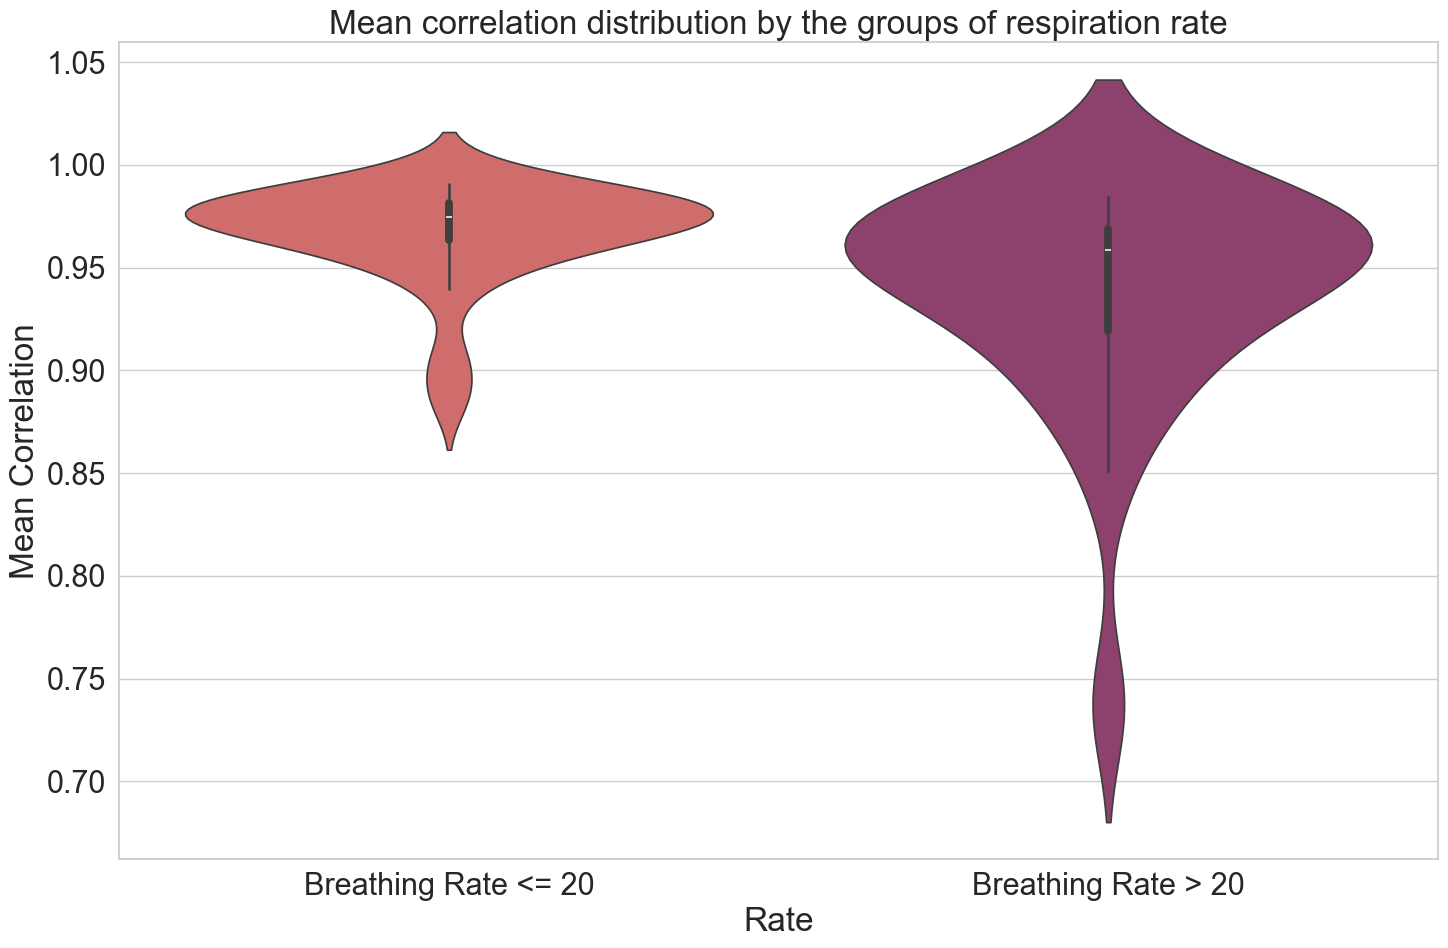

In [307]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid', font_scale=2)
sns.violinplot(data=mean_violin, x='Rate', y='Mean Correlation', palette='flare')
plt.title('Mean correlation distribution by the groups of respiration rate')
plt.tight_layout()
plt.savefig('data/figures/mean_corr_violin_new.pdf', dpi=300)
plt.show()

In [293]:
scipy.stats.mannwhitneyu(mean_violin['Mean Correlation'].loc[mean_violin['Rate'] == 'Mean Rate <= 20'].dropna(),
                            mean_violin['Mean Correlation'].loc[mean_violin['Rate'] == 'Mean Rate > 20'].dropna())

MannwhitneyuResult(statistic=470.0, pvalue=0.006475042344395344)

In [235]:
means['diff'] = means['Mean Rate <= 20'] - means['Mean Rate > 20']

In [236]:
means

,patient,Mean,Mean Rate <= 20,SD Rate <= 20,Mean Rate > 20,SD Rate > 20,diff
0,AGGA,0.963211,0.962837,0.019643,0.966691,0.013903,-0.003854
1,BLIW,0.966956,0.980216,0.014582,0.886454,0.136039,0.093763
2,BSEA,0.952738,0.952752,0.020781,0.942887,0.014224,0.009865
3,CJMJ,0.973032,0.973017,0.014108,0.977480,0.006231,-0.004463
4,CNSV,0.985245,0.985250,0.008354,0.984434,0.007366,0.000816
5,DDEX,0.954615,0.955741,0.025790,0.952574,0.042082,0.003167
6,EXRE,0.981768,0.981795,0.011656,0.980828,0.020746,0.000967
7,IQCX,0.981538,0.981814,0.011168,0.958955,0.035234,0.022859
8,IZZD,0.892056,0.886578,0.096399,0.902383,0.064380,-0.015804
9,LDXH,0.970419,0.972262,0.018442,0.954182,0.036480,0.018080


In [237]:
corr_all

,corr,datetime,patient,length,len_train
60739,0.016508,2021-11-23 15:11:06.480326731,WVKA,6,54
60740,-0.016078,2021-11-23 15:12:06.481413367,WVKA,6,54
60741,0.005481,2021-11-23 15:13:06.482500002,WVKA,6,54
60742,-0.046003,2021-11-23 15:14:06.483586638,WVKA,6,54
60743,-0.028333,2021-11-23 15:15:06.484673273,WVKA,6,54
...,...,...,...,...,...
34591,0.982681,2019-02-15 17:29:15.006602587,OXDN,2983,85636
34592,0.986655,2019-02-15 17:30:15.006794238,OXDN,2983,85636
34593,0.966700,2019-02-15 17:31:15.006985890,OXDN,2983,85636
34583,0.982064,2019-02-15 17:21:15.005069376,OXDN,2983,85636


In [238]:
corr_all_rate = pd.DataFrame()
means = pd.DataFrame()
patients = [file.split('_')[0] for file in os.listdir('data/autoencoders_epilepsy/') if file.endswith('corr_points_1s.parquet')]
for patient in sorted(patients):
    if patient in (['WVKA', 'LCGM', 'SZLU', 'KHTG', 'NJML', 'PGSE']):
        continue
    patient_info = Patient.patient_class(patient)
    corr_data = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s_resp_rate.parquet'))
    corr_data['patient'] = patient
    corr_data['resp_level'] = ((corr_data['rate'] <= 20) & (corr_data['rate'] >= 12)).astype(int)
    means = pd.concat([means, pd.DataFrame({'patient': patient, 'Mean':corr_data['corr'].mean(), 
                                            'Mean Rate 12-20': corr_data.loc[corr_data['resp_level']==1]['corr'].mean(), 
                                            'Mean Rate <12': corr_data.loc[corr_data['rate']<12]['corr'].mean(), 
                                            'Mean Rate >20': corr_data.loc[corr_data['resp_level']==0]['corr'].mean(), }, index=[0])], ignore_index=True)
    corr_all_rate = pd.concat([corr_all_rate, corr_data], ignore_index=True)

In [239]:
means

,patient,Mean,Mean Rate 12-20,Mean Rate <12,Mean Rate >20
0,AGGA,0.963211,0.963326,0.958520,0.962717
1,BLIW,0.966956,0.979893,0.982756,0.925657
2,BSEA,0.952738,0.952327,0.955353,0.955226
3,CJMJ,0.973032,0.973688,0.971072,0.971155
4,CNSV,0.985245,0.984000,0.986442,0.986417
5,DDEX,0.954615,0.951944,0.956795,0.955050
6,EXRE,0.981768,0.981508,0.982351,0.982232
7,IQCX,0.981538,0.981097,0.986180,0.984009
8,IZZD,0.892056,0.875865,0.941048,0.911529
9,LDXH,0.970419,0.970302,0.980389,0.970725


In [308]:
patient_seizures = pd.DataFrame()

patients = [file.split('_')[0] for file in os.listdir('data/autoencoders_epilepsy/') if file.endswith('corr_points_1s.parquet')]

for patient in patients:
    patient_info = Patient.patient_class(patient)
    patient_info.get_seizure_annotations()
    df_patient = patient_info.seizure_table.copy()
    df_patient['patient'] = patient
    patient_seizures = pd.concat([patient_seizures, df_patient], ignore_index=True)


No seizure annotations found for patient TZPY
Seizure label file not found for patient QJBW
No seizure annotations found for patient QJBW
Seizure label file not found for patient WZFI
No seizure annotations found for patient WZFI
No seizure annotations found for patient MHDG
No seizure annotations found for patient QDST
Seizure label file not found for patient KHTG
No seizure annotations found for patient KHTG
No seizure annotations found for patient LDXH
No seizure annotations found for patient IZZD
No seizure annotations found for patient OXDN
No seizure annotations found for patient IQCX


In [309]:
patient_seizures

,Crises,Data,Hora Clínica,Localização,lado,Focal / Generalisada,Fim,Sono/ Vigília,Tipo,Timestamp,...,Duração (s),Count,Count,Unnamed: 9,"Intervalo (10,10) onset no Bitalino",Hora EEG,Unnamed: 7,Unnamed: 6,Hora Baseline,Unnamed: 10
0,Crise1,2022-07-19 00:00:00,08:57:44,"TP, P, PO",R,FIAS,08:58:59,Vigília,"Pestanejo, discurso sem nexo, contacto alterado",2022-07-19 08:57:44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Crise2,2022-07-23 00:00:00,03:12:06,NaN,NaN,FIAS,03:13:38,Sono,NaN,2022-07-23 03:12:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crise3,2022-07-24 00:00:00,14:42:13,"TP, P, PO",R,interferido,NaN,NaN,NaN,2022-07-24 14:42:13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aura1,2022-07-22 00:00:00,17:18:21,NaN,NaN,Aura,NaN,NaN,Deja vu,2022-07-22 17:18:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aura2,2022-07-23 00:00:00,17:32:17,NaN,NaN,Aura,NaN,NaN,Deja vu,2022-07-23 17:32:17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Crise3,2022-08-11 00:00:00,01:36:30,FC e PO,L,FBTC,01:38:23,Sono,Hiperventilação e taquicardia e TC,2022-08-11 01:36:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Crise 1,2019-12-10 00:00:00,16:54:32,Temporal,R,FWIA,NaN,Vigília,NaN,2019-12-10 16:54:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Crise 2,2019-12-12 00:00:00,09:44:56,temporal,R,FWIA,NaN,Vigília,NaN,2019-12-12 09:44:56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Crise 3,2019-12-12 00:00:00,22:11:35,temporal,R,FWIA,NaN,Vigília,NaN,2019-12-12 22:11:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
fbtc_seizures = patient_seizures.loc[patient_seizures['Focal / Generalisada'].isin(['FBTC'])]
periictal_df = pd.DataFrame()
for i in range(len(fbtc_seizures)):
    start_time = fbtc_seizures.iloc[i]['Timestamp']
    fbtc_seizures_i = corr_all_rate.loc[corr_all_rate['datetime'].between(start_time-pd.Timedelta(minutes=30), start_time + pd.Timedelta(minutes=30))].copy()
    fbtc_seizures_i['date_relative'] = (fbtc_seizures_i['datetime'] - start_time).dt.total_seconds()
    fbtc_seizures_i['Crises'] = fbtc_seizures.iloc[i]['Crises'] 
    fbtc_seizures_i['Seizure Type'] = fbtc_seizures.iloc[i]['Focal / Generalisada']
    fbtc_seizures_i['Count'] = i
    periictal_df = pd.concat([periictal_df, fbtc_seizures_i], ignore_index=True)

In [311]:
periictal_df

,corr,rate,datetime,patient,resp_level,date_relative,Crises,Seizure Type,Count
0,0.945589,11.314825,2019-04-10 19:35:54.815931625,VNVW,1,-1748.184068,Crise 1,FBTC,0
1,0.971860,10.126582,2019-04-10 19:36:54.816123319,VNVW,1,-1688.183877,Crise 1,FBTC,0
2,0.965644,7.448459,2019-04-10 19:37:54.816315013,VNVW,1,-1628.183685,Crise 1,FBTC,0
3,0.980260,9.523810,2019-04-10 19:38:54.816506707,VNVW,1,-1568.183493,Crise 1,FBTC,0
4,0.908125,9.885584,2019-04-10 19:39:54.816698401,VNVW,1,-1508.183302,Crise 1,FBTC,0
...,...,...,...,...,...,...,...,...,...
618,0.986668,15.352981,2022-08-11 02:01:40.397100682,YIVL,1,1510.397101,Crise3,FBTC,17
619,0.982988,13.759647,2022-08-11 02:02:40.397109098,YIVL,1,1570.397109,Crise3,FBTC,17
620,0.986364,15.810277,2022-08-11 02:03:40.397117513,YIVL,1,1630.397118,Crise3,FBTC,17
621,0.987551,13.457944,2022-08-11 02:04:40.397125929,YIVL,1,1690.397126,Crise3,FBTC,17


In [312]:
periictal_df.groupby('patient').min()

,corr,rate,datetime,resp_level,date_relative,Crises,Seizure Type,Count
patient,,,,,,,,
AGGA,0.891723,9.081354,2021-12-14 04:33:45.087941544,1,-1746.918556,Crise 2,FBTC,2
BLIW,0.467467,5.859375,2022-10-27 17:44:19.903558522,0,-1772.094059,Crise2,FBTC,9
VNVW,0.904449,4.574696,2019-04-10 19:35:54.815931625,1,-1748.184068,Crise 1,FBTC,0
YIVL,0.803023,5.918619,2022-08-10 00:39:40.405403499,0,-1789.603362,Crise1,FBTC,15
YWJN,0.516419,1.763409,2020-01-09 20:35:17.253545072,0,-1782.748587,Crise 6,FBTC,6


<Axes: ylabel='corr'>

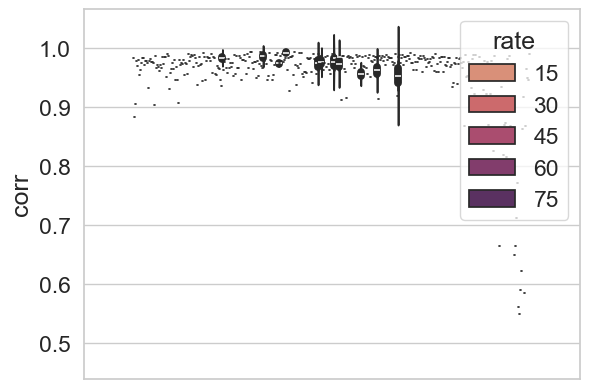

In [245]:
sns.violinplot(data=periictal_df, y='corr', hue='rate', palette='flare')

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



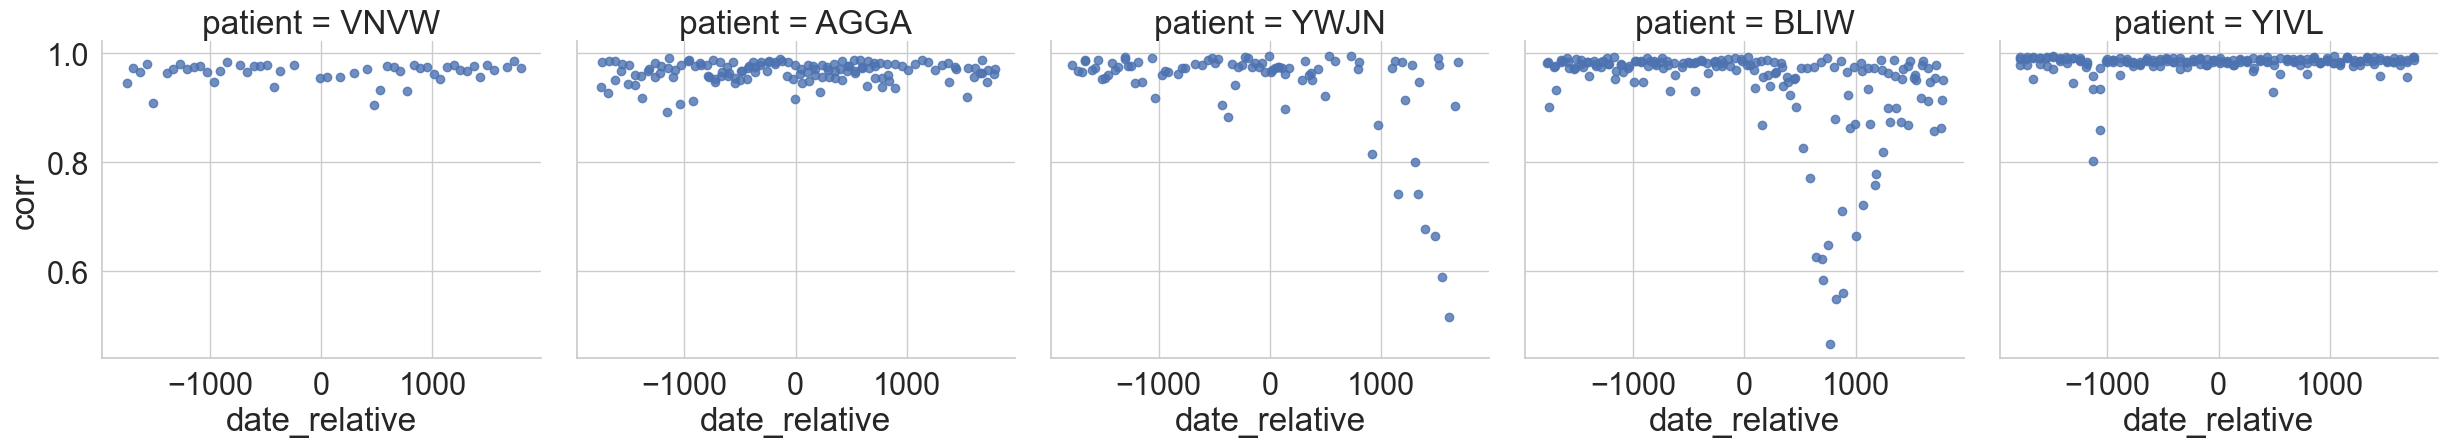

In [314]:
sns.set(style='whitegrid', font_scale=2)
fig = sns.lmplot(data=periictal_df, x='date_relative', y='corr', col='patient', col_wrap=5, palette='flare', scatter=True, fit_reg=False)
plt.savefig('data/figures/periictal_corr_fbtc.pdf', dpi=300)

i = 0

# for axis in fig.axes:
#     seizure_i_data = periictal_df.loc[periictal_df['Count']==i].copy()
#     if seizure_i_data.empty:
#         continue
#     axis.set_xlabel('Time (s)')
#     axis.set_ylabel('Correlation Points')
#     axis.set_ylim(-1, 1)#seizure_i_data['resp_rate'].max()+1)
#     axis.lines[0].set_color('#03587B')
#     axis.set_xticks(seizure_i_data['index'][::len(seizure_i_data)//8])
#     axis.set_xticklabels(seizure_i_data['datetime'][::len(seizure_i_data)//8].dt.strftime('%H:%M:%S'), rotation=45)
#     axis.vlines(seizure_i_data.loc[seizure_i_data['onset']==True, 'index'], -1, 1, color='#951428')
#     i += 1

In [249]:
axis

<Axes: title={'center': 'patient = VNVW'}, xlabel='Time (s)', ylabel='Correlation Points'>

In [210]:
patient_seizures['Focal / Generalisada'].unique()

array(['FIAS', 'interferido', 'Aura', 'F', 'FWIA', 'E', 'F(ME)',
       'F(ME) - alt no EEG mas sem padrão ictal', 'Focal', 'FAS', 'FBTC',
       'Funk', '?', 'F?(ME)', 'Focal cognitiva ', 0, 'FUAS'], dtype=object)

In [318]:
corr_all_rate

,corr,rate,datetime,patient,resp_level
0,0.963556,14.098509,2021-12-14 04:33:45.087941544,AGGA,1
1,0.891723,13.442482,2021-12-14 04:34:45.088133227,AGGA,1
2,0.955863,14.427746,2021-12-14 04:35:45.088324911,AGGA,1
3,0.906126,13.793103,2021-12-14 04:36:45.088516594,AGGA,1
4,0.911747,14.258434,2021-12-14 04:38:45.087914917,AGGA,1
...,...,...,...,...,...
63108,0.950052,20.864229,2020-01-10 09:03:17.254369029,YWJN,0
63109,0.983405,11.777077,2020-01-10 09:10:17.250605739,YWJN,1
63110,0.978271,10.762332,2020-01-10 09:18:17.256501268,YWJN,1
63111,0.946327,18.564177,2020-01-10 09:19:17.259358558,YWJN,1


In [316]:
fbtc_seizures = patient_seizures.loc[patient_seizures['Focal / Generalisada'].isin(['FIAS', 'FWIA'])]
periictal_df = pd.DataFrame()
for i in range(len(fbtc_seizures)):
    start_time = fbtc_seizures.iloc[i]['Timestamp']
    fbtc_seizures_i = corr_all_rate.loc[corr_all_rate['datetime'].between(start_time-pd.Timedelta(minutes=30), start_time + pd.Timedelta(minutes=30))].copy()
    fbtc_seizures_i['date_relative'] = (fbtc_seizures_i['datetime'] - start_time).dt.total_seconds()
    fbtc_seizures_i['Crises'] = fbtc_seizures.iloc[i]['Crises'] 
    fbtc_seizures_i['Seizure Type'] = fbtc_seizures.iloc[i]['Focal / Generalisada']
    periictal_df = pd.concat([periictal_df, fbtc_seizures_i], ignore_index=True)

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



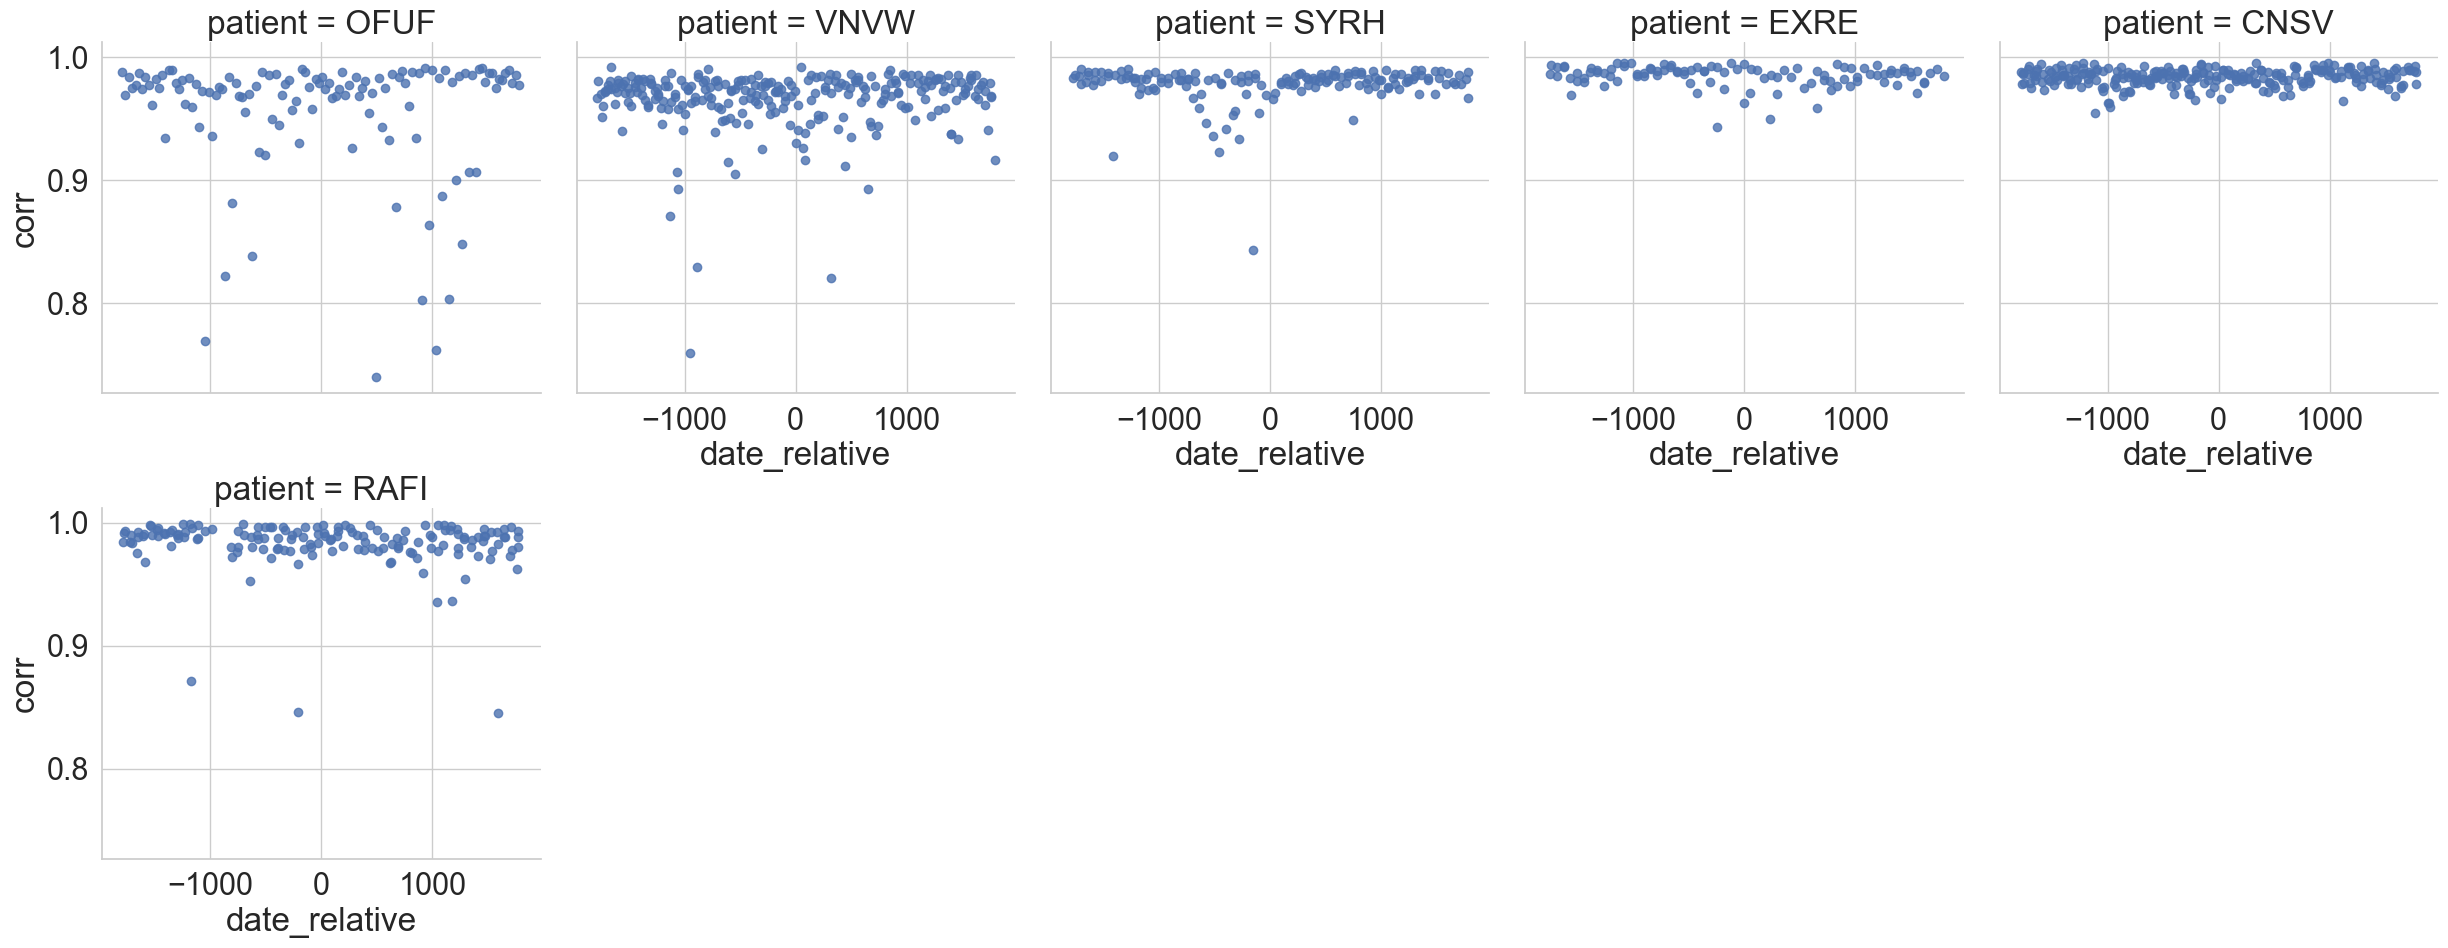

In [317]:
sns.set(style='whitegrid', font_scale=2)
sns.lmplot(data=periictal_df, x='date_relative', y='corr', col='patient', col_wrap=5, palette='flare', scatter=True, fit_reg=False)
plt.savefig('data/figures/periictal_corr_fwia.pdf', dpi=300)

In [211]:
fbtc_seizures = patient_seizures.loc[patient_seizures['Focal / Generalisada'].isin(['FAS', 'F', 'Focal', 'FUAS'])]
periictal_df = pd.DataFrame()
for i in range(len(fbtc_seizures)):
    start_time = fbtc_seizures.iloc[i]['Timestamp']
    fbtc_seizures_i = corr_all_rate.loc[corr_all_rate['datetime'].between(start_time-pd.Timedelta(minutes=30), start_time + pd.Timedelta(minutes=30))].copy()
    fbtc_seizures_i['date_relative'] = (fbtc_seizures_i['datetime'] - start_time).dt.total_seconds()
    fbtc_seizures_i['Crises'] = fbtc_seizures.iloc[i]['Crises'] 
    fbtc_seizures_i['Seizure Type'] = fbtc_seizures.iloc[i]['Focal / Generalisada']
    periictal_df = pd.concat([periictal_df, fbtc_seizures_i], ignore_index=True)

/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


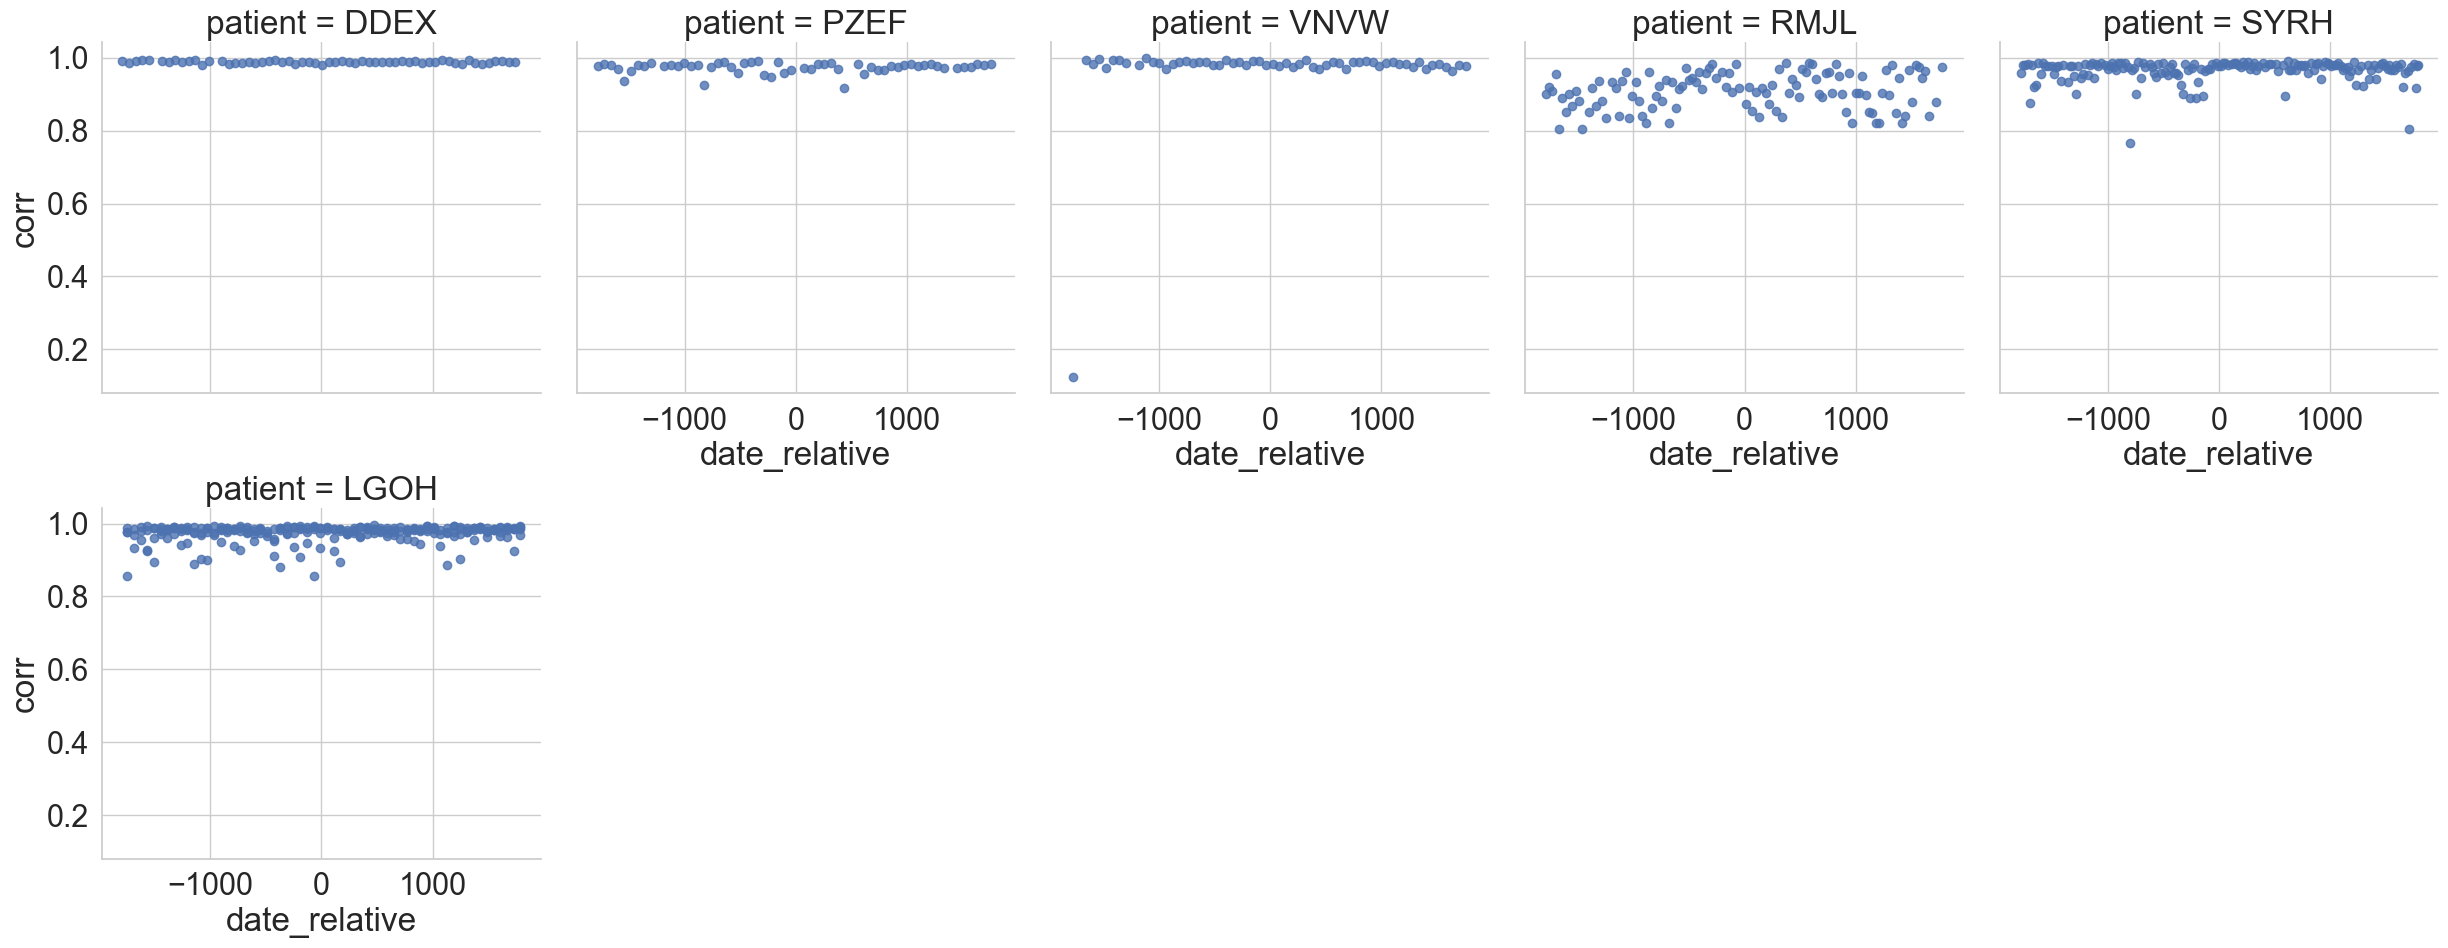

In [212]:
sns.set(style='whitegrid', font_scale=2)
sns.lmplot(data=periictal_df, x='date_relative', y='corr', col='patient', col_wrap=5, palette='flare', scatter=True, fit_reg=False)
plt.savefig('data/figures/periictal_corr_fwia.pdf', dpi=300)

In [ ]:
fbtc_seizures = patient_seizures.loc[patient_seizures['Focal / Generalisada'].isin(['FAS', 'F', 'Focal', 'FUAS'])]
periictal_df = pd.DataFrame()
for i in range(len(fbtc_seizures)):
    start_time = fbtc_seizures.iloc[i]['Timestamp']
    fbtc_seizures_i = corr_all_rate.loc[corr_all_rate['datetime'].between(start_time-pd.Timedelta(minutes=30), start_time + pd.Timedelta(minutes=30))].copy()
    fbtc_seizures_i['date_relative'] = (fbtc_seizures_i['datetime'] - start_time).dt.total_seconds()
    fbtc_seizures_i['Crises'] = fbtc_seizures.iloc[i]['Crises'] 
    fbtc_seizures_i['Seizure Type'] = fbtc_seizures.iloc[i]['Focal / Generalisada']
    periictal_df = pd.concat([periictal_df, fbtc_seizures_i], ignore_index=True)

In [392]:
corr_all_rate_seizures = corr_all_rate.copy()
corr_all_rate_seizures['Region'] = 'Interictal'
for idx in range(len(patient_seizures)):
    row = patient_seizures.iloc[idx]
    if row['Focal / Generalisada'] in ['FAS', 'F', 'Focal', 'FUAS', 'FIAS', 'FWIA', 'FBTC']:
        corr_all_rate_seizures.loc[corr_all_rate_seizures['datetime'].between(row['Timestamp']-pd.Timedelta(minutes=30), row['Timestamp'] + pd.Timedelta(minutes=30)), 'Region'] = 'Peri-ictal'
        corr_all_rate_seizures.loc[corr_all_rate_seizures['datetime'].between(row['Timestamp']-pd.Timedelta(minutes=30), row['Timestamp'] + pd.Timedelta(minutes=30)), 'Seizure Type'] = row['Focal / Generalisada'] + ' ' + str(idx)
        
    else:
        print(row['Focal / Generalisada'])
    #    print('Dropping periictal region of seizure {idx}'.format(idx=idx))
    #    corr_all_rate.drop(corr_all_rate.loc[corr_all_rate['datetime'].between(row['Timestamp']-pd.Timedelta(minutes=60), row['Timestamp'] + pd.Timedelta(minutes=60))].index, inplace=True)


interferido
Aura
Aura
E
E
E
E
E
E
E
E
E
E
E
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME)
F(ME) - alt no EEG mas sem padrão ictal
F(ME)
F(ME)
E
E
E
E
E
E
E
E
Funk
Funk
E
E
Funk
Funk
Funk
E
E
E
E
Funk
E
E
E
E
E
Funk
Funk
E
E
E
E
E
E
E
E
E
?
E
?
E
F?(ME)
F?(ME)
Funk
E
E
E
E
E
E
E
E
E
E
E
Focal cognitiva 
E
F(ME)
F(ME)
F(ME)
E
E
E
E
0
0
0
Funk
Funk
Funk
Funk
Funk
Funk
Funk
Funk
Funk
Funk
0


In [393]:
# ignore patients without seizure periods
patient_ignore = []
for patient in corr_all_rate_seizures['patient'].unique():
    if 'Peri-ictal' not in corr_all_rate_seizures.loc[corr_all_rate_seizures['patient']==patient]['Region'].unique():
        patient_ignore.append(patient)
corr_all_rate_seizures_set = corr_all_rate_seizures.loc[~corr_all_rate_seizures['patient'].isin(patient_ignore)].copy()

AGGA 13.7 13.9 0.97 0.96 0.00026022683607485427 0.036578068838312085
BLIW 17.0 16.6 0.94 0.97 0.5787885036995957 8.415866691716449e-16
CNSV 11.5 12.0 0.98 0.99 0.0025052783405730703 1.303223681073604e-07
EXRE 13.1 12.9 0.98 0.98 0.1247979092990368 0.0003253916017799276
LGOH 20.2 19.8 0.97 0.97 0.12184055784523917 0.6427665914602623
OFUF 16.8 17.2 0.96 0.97 0.8808787857324517 0.0009547187203141672
PZEF 18.1 16.8 0.97 0.97 0.0009083706502076432 0.6011036859014385
RAFI 12.2 14.2 0.98 0.97 4.191886324057999e-06 2.6009942894554407e-15
SYRH 15.6 17.8 0.97 0.97 2.5236687126654345e-12 6.512764374087235e-05
VNVW 8.9 10.8 0.97 0.94 1.1600240265528381e-15 3.4253287574717547e-06
YIVL 14.4 14.3 0.98 0.98 0.6831345153399108 0.8725939819063588
YWJN 14.8 12.5 0.94 0.97 0.00017021720656884546 0.00037623993474616415


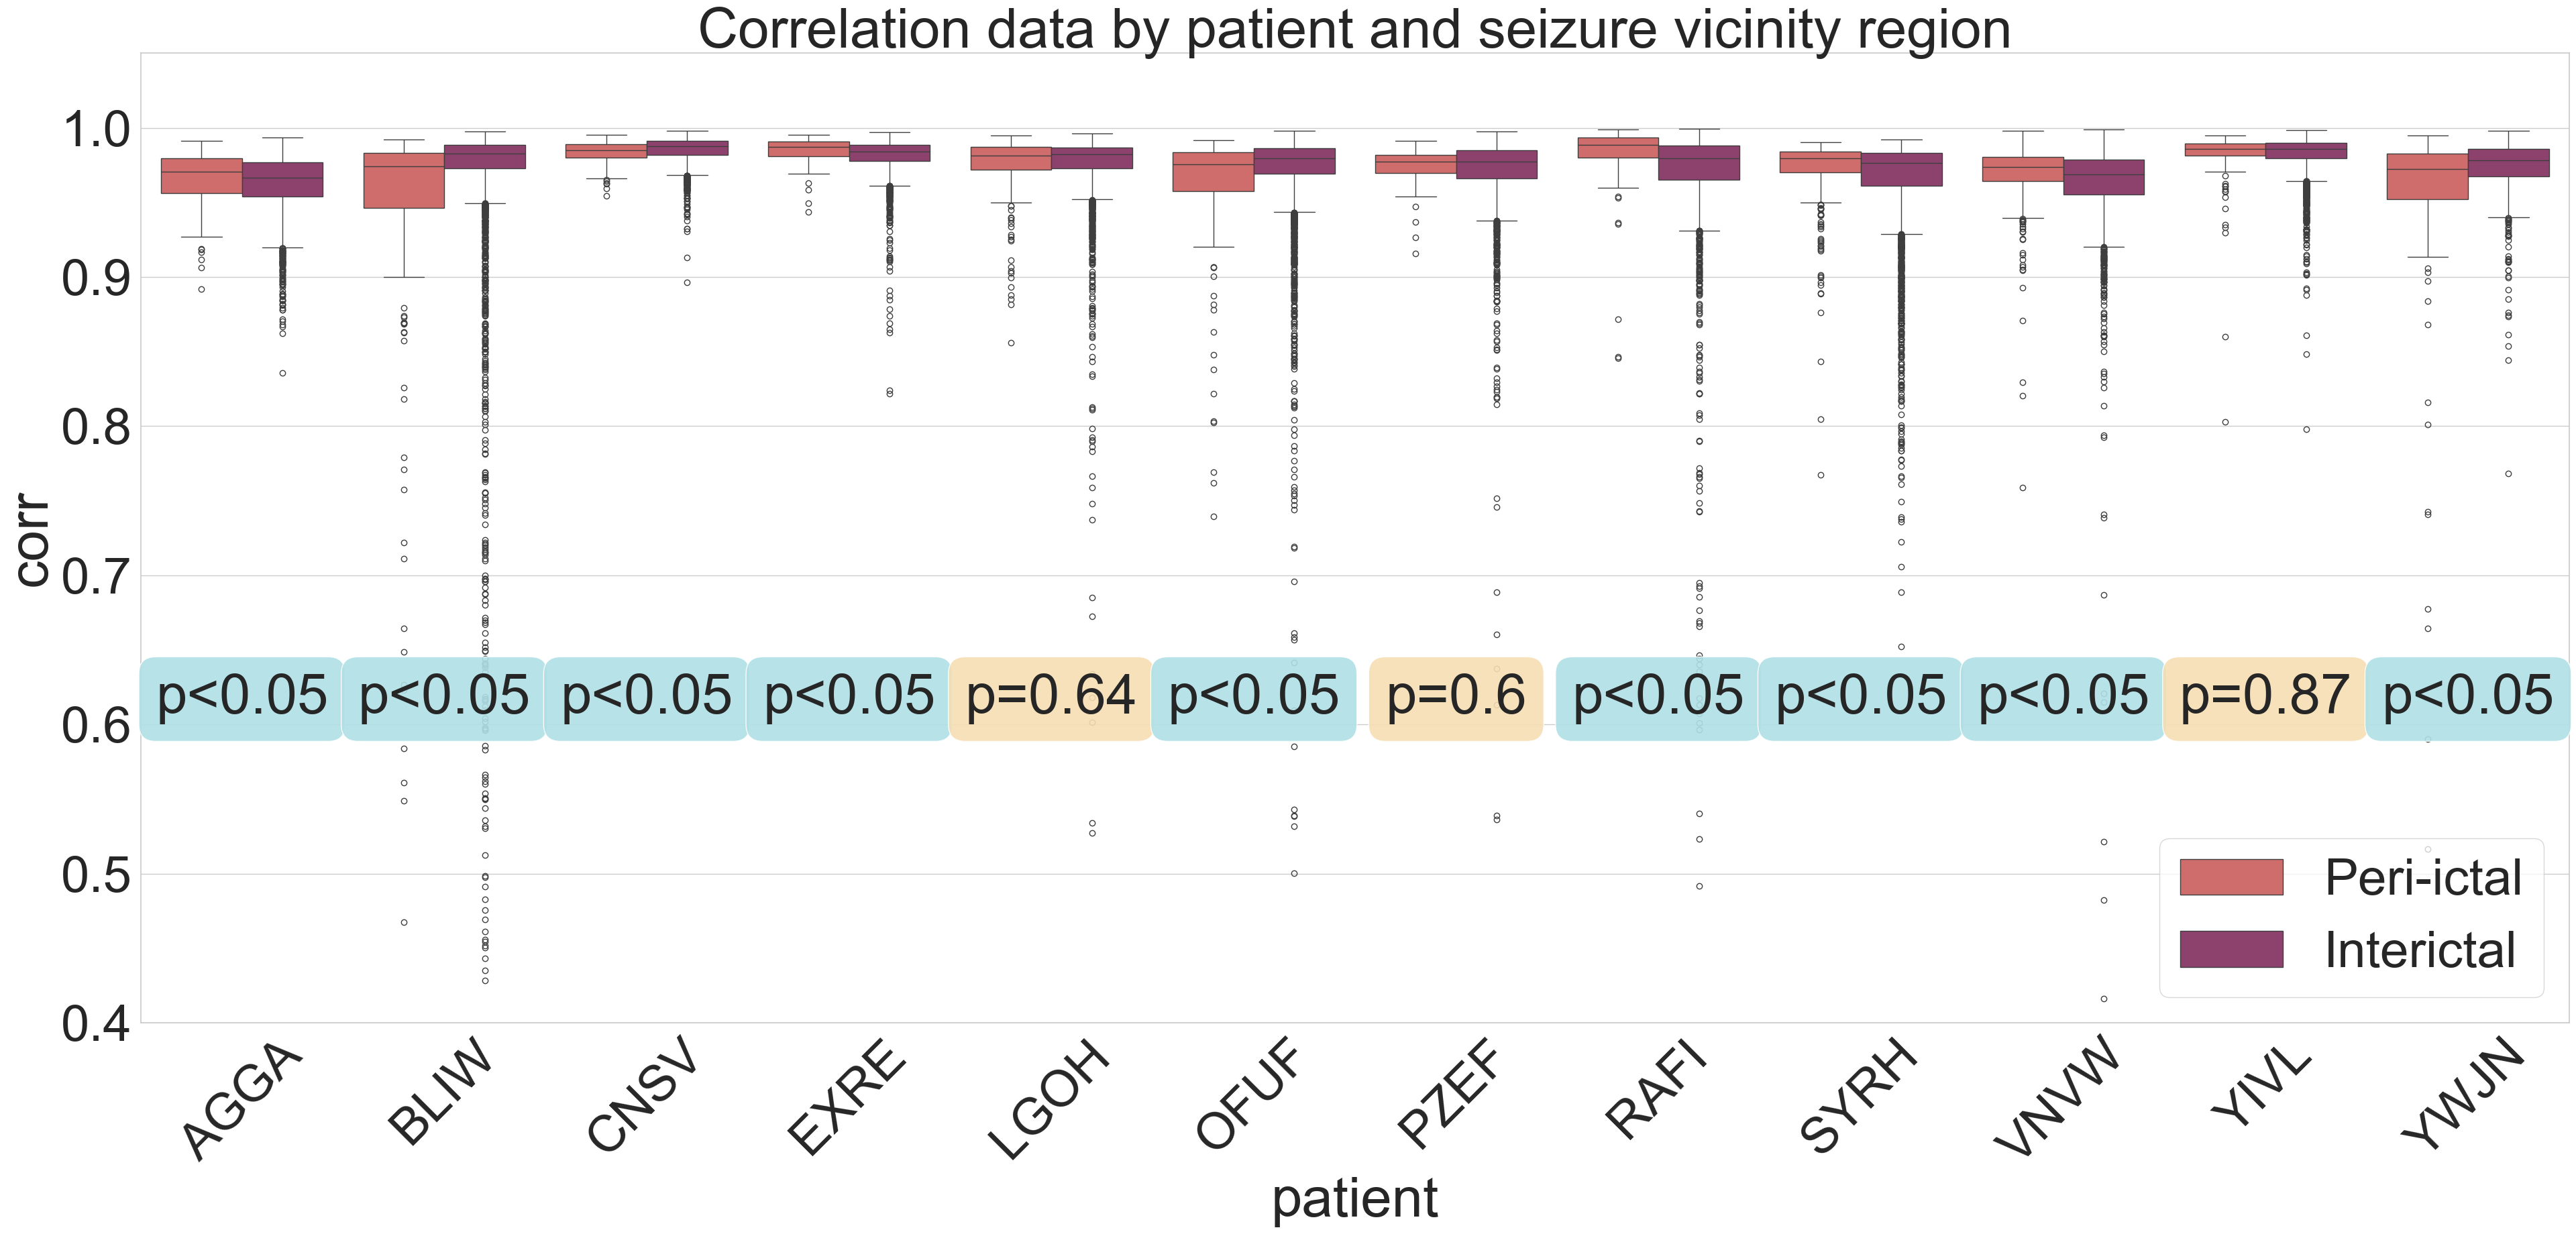

In [409]:
plt.figure(figsize=(40, 20))
sns.set(style='whitegrid', font_scale=5)
sns.boxplot(data=corr_all_rate_seizures_set, hue='Region', y='corr', x='patient', palette='flare')
plt.xticks(rotation=45)
plt.ylim(0.4, 1.05)
plt.legend(loc='lower right')

plt.title('Correlation data by patient and seizure vicinity region')
i = 0
for patient in sorted(corr_all_rate_seizures_set['patient'].unique()):
    corr_patient = corr_all_rate_seizures_set.loc[corr_all_rate_seizures_set['patient']==patient]
    stats_p_value = scipy.stats.mannwhitneyu(corr_patient.loc[corr_patient['Region']=='Interictal', 'corr'],
                                            corr_patient.loc[corr_patient['Region']=='Peri-ictal', 'corr'])
    p_value = np.round(stats_p_value.pvalue, 2)
    stats_p_value_rate = scipy.stats.mannwhitneyu(corr_patient.loc[corr_patient['Region']=='Interictal', 'rate'].dropna(),
                                            corr_patient.loc[corr_patient['Region']=='Peri-ictal', 'rate'].dropna())
    

    if stats_p_value.pvalue < 0.05:
        props = dict(boxstyle='round', facecolor='powderblue', alpha=0.9)
        plt.text((i)*.5, 0.6, "p<0.05".format(p=stats_p_value.pvalue), ha='center', bbox=props, va='bottom')
    else:
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
        plt.text((i)*.5, 0.6, f"p={p_value}", ha='center', va='bottom', bbox=props)
    i += 2
    mean_corr_pi = np.round(corr_patient.loc[corr_patient['Region']=='Peri-ictal', 'corr'].mean(), 2)
    mean_corr_ii = np.round(corr_patient.loc[corr_patient['Region']=='Interictal', 'corr'].mean(), 2)
    mean_rate_pi = np.round(corr_patient.loc[corr_patient['Region']=='Peri-ictal', 'rate'].median(), 1)
    mean_rate_ii = np.round(corr_patient.loc[corr_patient['Region']=='Interictal', 'rate'].median(), 1)
    print(f'{patient} {mean_rate_pi} {mean_rate_ii} {mean_corr_pi} {mean_corr_ii} {stats_p_value_rate.pvalue} {stats_p_value.pvalue}') 
    
    

plt.tight_layout()
plt.savefig('data/figures/corr_boxplot_color_dots_seizures.pdf', dpi=300)

In [400]:

for patient in sorted(corr_all_rate_seizures_set['patient'].unique()):
    corr_patient = corr_all_rate_seizures_set.loc[corr_all_rate_seizures_set['patient']==patient]
    print(patient, corr_patient['Seizure Type'].unique())

AGGA ['FBTC 92' nan 'FBTC 93' 'FBTC 94']
BLIW [nan 'FBTC 211' 'FBTC 212' 'FBTC 213']
CNSV [nan 'FWIA 179' 'FWIA 180' 'FWIA 181' 'FWIA 182' 'FWIA 183']
EXRE [nan 'FIAS 163' 'FIAS 164']
LGOH [nan 'F 152' 'F 153' 'F 154' 'F 155']
OFUF [nan 'FIAS 63' 'FIAS 64']
PZEF [nan 'F 65']
RAFI [nan 'FWIA 184' 'FWIA 185' 'FWIA 186' 'FWIA 187']
SYRH [nan 'FIAS 143' 'FAS 145' 'FAS 146' 'FAS 147' 'FAS 148' 'FIAS 149'
 'FIAS 150']
VNVW [nan 'FBTC 85' 'F 84' 'FWIA 86' 'FWIA 87' 'FWIA 88' 'FWIA 89' 'FWIA 90']
YIVL [nan 'FBTC 218' 'FBTC 219' 'FBTC 220']
YWJN [nan 'FBTC 174' 'FBTC 175' 'FBTC 176']


array(['FBTC 92', nan, 'FBTC 93', 'FBTC 94'], dtype=object)